### Imports necesarios y carga de datos

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import scipy.stats as scp
from sklearn import preprocessing
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing

In [3]:
#Se crea la función load_dataset y cargaremos los datasets referentes a reseñas de ebay abriendo los ficheros csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

datasetEbay = load_dataset('../../data/sample/ebay_reviews.csv')

datasetCleaned = load_dataset('../../data/sample/ebay_reviews_cleaned.csv')

### Analisis de datos

In [7]:
print("Primeros 5 valores de la base de datos Ebay:")
datasetEbay.head()


Primeros 5 valores de la base de datos:


,category,review title,review content,rating
0,Headsets,Wireless gaming headset,This gaming headset ticks all the boxes # look...,5
1,Headsets,"Good for those with a big head, low budget","Easy setup, rated for 6 hours battery but mine...",3
2,Headsets,MezumiWireless Gaming Headset,I originally bought this wireless headset for ...,5
3,Headsets,HW- S2 great headset.,"This is my 2nd Mezumi headset, It kills the fi...",5
4,Headsets,BEST HEADPHONES I'VE PURCHASED IN MY ENTIRE LIFE,This is probably the best headset I've purchas...,5


In [8]:
print("Primeros 5 valores de la base de datos Clean:")
datasetCleaned.head()


Primeros 5 valores de la base de datos Clean:


,Unnamed: 0,rating,review
0,0,1,wireless gaming headset gaming headset ticks ...
1,1,0,good big head low budget easy setup rated 6 ho...
2,2,1,mezumiwireless gaming headset originally bough...
3,3,1,hw s2 great headset 2nd mezumi headset kills f...
4,4,1,best headphones ive purchased entire life prob...


In [9]:
print("Dimensiones de la base de datos Ebay:")
print(datasetEbay.shape)

Dimensiones de la base de datos Ebay:
(44756, 4)


In [10]:
print("Dimensiones de la base de datos Clean:")
print(datasetCleaned.shape)

Dimensiones de la base de datos Clean:
(45752, 3)


In [11]:
print("Numero de valores null en Ebay:")
print(datasetEbay.isnull().sum())

Numero de valores null en Ebay:
category          0
review title      0
review content    0
rating            0
dtype: int64


In [12]:
print("Numero de valores null en Clean:")
print(datasetCleaned.isnull().sum())

Numero de valores null en Clean:
Unnamed: 0    0
rating        0
review        0
dtype: int64


In [13]:
#Se Llama a la función describe para ver si hay inconsistencias en los datos
print("Estadisticas sobre los atributos de la base de datos Ebay:")
datasetEbay.describe()

Estadisticas sobre los atributos de la base de datos Ebay:


,rating
count,44756.000000
mean,4.656337
std,0.847600
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


#### No se detectan inconsistencias en las valoraciones de cada producto al ser el minimo de estrellas 1 y maximo 5

In [16]:
#Se llama a la función describe para ver si hay inconsistencias en los datos
print("Estadisticas sobre los atributos de la base de datos Clean:")
datasetCleaned.describe()

Estadisticas sobre los atributos de la base de datos Clean:


,Unnamed: 0,rating
count,45752.000000,45752.000000
mean,22875.500000,0.879918
std,13207.609095,0.440717
min,0.000000,-1.000000
25%,11437.750000,1.000000
50%,22875.500000,1.000000
75%,34313.250000,1.000000
max,45751.000000,1.000000


In [18]:
#Cabe destacar que en este dataset se transofrman las valoraciones con objetivo de unificarlas, por lo tanto las muestras
# negativas (-1) corresponden a valoraciones de 1 y 2 estrellas
print("Muestras con Rating negativo (0 y 1 estrellas):")
datasetCleaned[datasetCleaned['rating'] < 0]

Muestras con Rating negativo (0 y 1 estrellas):


,Unnamed: 0,rating,review
18,18,-1,not working asked return havent heard not working
22,22,-1,misleading wireless gaming headset doesn’t wor...
32,32,-1,bad shipping came original xbox controller box...
154,154,-1,terrible game don’t waste time lol
155,155,-1,bad story not worth 60
157,157,-1,sucked verified purchase no
229,229,-1,great joystick fun unitl died within 2 weeks b...
266,266,-1,not working headphones working perfectly thir...
467,467,-1,not buy unit crashed multiple times hardlocks ...
468,468,-1,sh price point i’m giving 1 star sole purpose ...


#### Se procede a eliminar la columna que contiene los indices ya que no nos aporta información en el Dataset Cleaned

In [21]:
datasetCleaned.drop(['Unnamed: 0'],axis=1, inplace=True)

In [22]:
datasetCleaned.head()

,rating,review
0,1,wireless gaming headset gaming headset ticks ...
1,0,good big head low budget easy setup rated 6 ho...
2,1,mezumiwireless gaming headset originally bough...
3,1,hw s2 great headset 2nd mezumi headset kills f...
4,1,best headphones ive purchased entire life prob...


### Analisis de cada atributo de la base de datos Ebay:

#### Category: Categoria a la que pertenece un producto vendido (String)

#### Review Title: Titulo de la reseña de un usuario (String)

#### Review Content: Descripción (String) de la reseña de un usuario

#### Rating: Valoracion en estrellas (del 1 al 5) de un usuario sobre un producto

### Analisis de cada atributo de la base de datos Ebay Cleaned:



#### Review : Descripción (String) de la reseña de un usuario

#### Rating: Valoracion en estrellas (del -1 al 2) de un usuario sobre un producto, donde -1 engloba las valoraciones 1,2.                              0 corresponde a 3 estrellas, y 1 corresponde a 4 y 5 estrellas

In [25]:
#Relacion entre variables
datasetEbay.corr()

,rating
rating,1.0


##### Como se puede observar no mas alla de rating como variable quantificable para extraer relaciones, por lo que se procede a quantificar las variables no numericas


In [27]:
datasetEbay.head()

,category,review title,review content,rating
0,Headsets,Wireless gaming headset,This gaming headset ticks all the boxes # look...,5
1,Headsets,"Good for those with a big head, low budget","Easy setup, rated for 6 hours battery but mine...",3
2,Headsets,MezumiWireless Gaming Headset,I originally bought this wireless headset for ...,5
3,Headsets,HW- S2 great headset.,"This is my 2nd Mezumi headset, It kills the fi...",5
4,Headsets,BEST HEADPHONES I'VE PURCHASED IN MY ENTIRE LIFE,This is probably the best headset I've purchas...,5


In [29]:
labelencoder = preprocessing.LabelEncoder()
datasetEbay['category'] = labelencoder.fit_transform(datasetEbay['category'])


datasetEbay.head()

,category,review title,review content,rating
0,55,Wireless gaming headset,This gaming headset ticks all the boxes # look...,5
1,55,"Good for those with a big head, low budget","Easy setup, rated for 6 hours battery but mine...",3
2,55,MezumiWireless Gaming Headset,I originally bought this wireless headset for ...,5
3,55,HW- S2 great headset.,"This is my 2nd Mezumi headset, It kills the fi...",5
4,55,BEST HEADPHONES I'VE PURCHASED IN MY ENTIRE LIFE,This is probably the best headset I've purchas...,5


In [30]:
datasetEbay['category']

0         55
1         55
2         55
3         55
4         55
5         55
6         55
7         55
8         55
9         55
10        55
11        55
12        55
13        55
14        55
15        55
16        55
17        55
18        55
19        55
20        55
21        55
22        55
23        55
24        55
25        33
26        33
27        33
28        33
29        33
        ... 
44726    117
44727    117
44728    117
44729    117
44730    117
44731    117
44732    117
44733    117
44734    117
44735    117
44736    117
44737    117
44738    117
44739    117
44740    117
44741    117
44742    117
44743    117
44744    117
44745    117
44746    117
44747    117
44748    117
44749    117
44750    117
44751    117
44752    117
44753    117
44754    117
44755    117
Name: category, Length: 44756, dtype: int32

In [32]:
labelencoder = preprocessing.LabelEncoder()
datasetEbay['review title'] = labelencoder.fit_transform(datasetEbay['review title'])

datasetEbay['review content'] = labelencoder.fit_transform(datasetEbay['review content'])


datasetEbay.head()

,category,review title,review content,rating
0,55,27533,31371,5
1,55,9648,4637,3
2,55,18355,15636,5
3,55,14386,32168,5
4,55,2799,32393,5


La función LabelEncoder codifica etiquetas de una característica categórica en valores numéricos entre 0 y el número de clases menos 1.
De manera que trasforma las etiquetas string segun su igualdad en numeros enteros

#### Debido al resultado de codificar las variables en la base de datos de Ebay, se considera descartar el uso de la base de datos EbayCleaned, debido a la disparidad de correlacion entre la variable que ofrece la descripción de una reseña y el valor de la misma

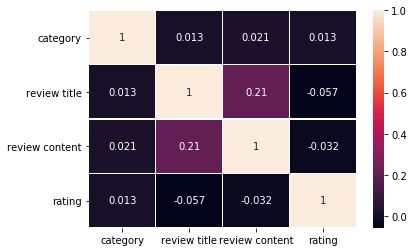

In [34]:
tablaCorrelaciones = datasetEbay.corr()
plt.figure()

ax = sns.heatmap(tablaCorrelaciones, annot=True, linewidths=.5)

### Como era de esperar los atributos codificados guardan poca relacion entre si, por lo tanto vale la pena normalizarlos

#### Previamente a la normalizacion, se establece como variable objetivo el Atributo Rating, ya que se considera mas interesante predecir las reseñas que un usuario puede aportar sobre un producto basandonos en la categoria.


In [36]:
#Normalización de datos
scaler = preprocessing.MinMaxScaler()
scaler.fit(datasetEbay)
datasetEbay = pd.DataFrame(scaler.transform(datasetEbay), index=datasetEbay.index, columns=datasetEbay.columns)

C:\Users\adri-\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [37]:
datasetEbay.head()

,category,review title,review content,rating
0,0.341615,0.863131,0.741771,1.0
1,0.341615,0.302455,0.109642,0.5
2,0.341615,0.575410,0.369715,1.0
3,0.341615,0.450986,0.760617,1.0
4,0.341615,0.087746,0.765937,1.0


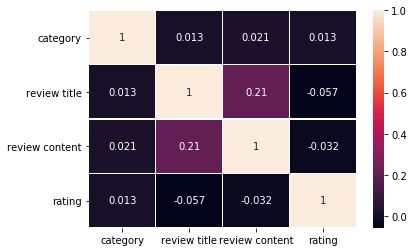

In [38]:
tablaCorrelaciones = datasetEbay.corr()
plt.figure()

ax = sns.heatmap(tablaCorrelaciones, annot=True, linewidths=.5)

A pesar de la normalizacion de datos seguimos obteniendo muy baja correlacion para el conjunto de atributos disponible devido a la disparidad y la poca relacion que estos guardan en el mundo real


Notar que se ha realizado la normalizacion con MinMaxEscaler el cual transforma las características escalando cada una de ellas a un rango determinado,
individualmente de manera que se encuentre en el rango dado en el conjunto de entrenamiento entre cero y uno.

#### Se considera que la eliminacion de outliers en este modelo no tiene sentido ya que las variables no son numericas y solo estamos codificando-las

### Distribucion de los datos en forma grafica

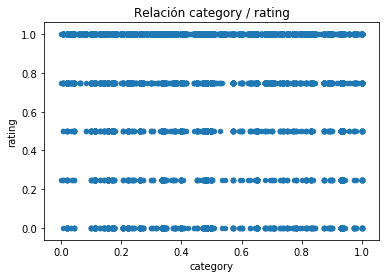

In [43]:
datasetEbay.plot(kind='scatter', x='category', y='rating', title='Relación category / rating')

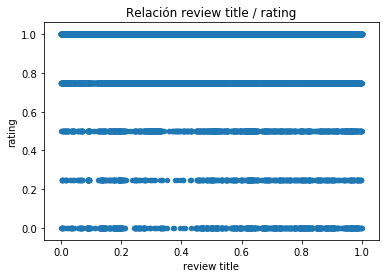

In [44]:
datasetEbay.plot(kind='scatter', x='review title', y='rating', title='Relación review title / rating')

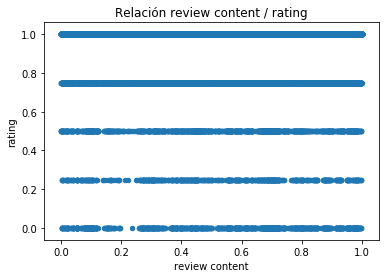

In [46]:
datasetEbay.plot(kind='scatter', x='review content', y='rating', title='Relación review content / rating')

Como se puede observar los valores no guardan ninguna correlacion entre si, debido que hay todo tipo de reseñas por cada categoria

Ademas, es muy dificil crear un modelo en base a titulos y descripciones escritas por el usuario, por lo tanto se intentará predecir un rating a partir de la categoria de un producto, cosa que puede tener mas sentido y ademas son los atributos que guardan mas correlacion

In [48]:
datasetE.drop(['review content', 'review title'],axis=1, inplace=True)

KeyError: "['review content' 'review title'] not found in axis"